In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import cv2
import matplotlib.image as ima

In [ ]:
base_model = tf.keras.applications.efficientnet.EfficientNetB4(include_top=False)
base_model.trainable = False
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
outputs = layers.Dense(2, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

71686520/71686520 [==============================] - 0s 0us/step


In [ ]:
model.load_weights("/content/drive/MyDrive/Colab_Notebooks/Robot/01_Object_Detection/model_weights.h5")

In [5]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colab_Notebooks/Robot/01_Object_Detection/model/object_detection")

In [6]:
classes = ["OBJECT DETECTED" , "NO OBJECT DETECTED"]

How many Prediction you want : 3
1/1 [==============================] - 0s 33ms/step


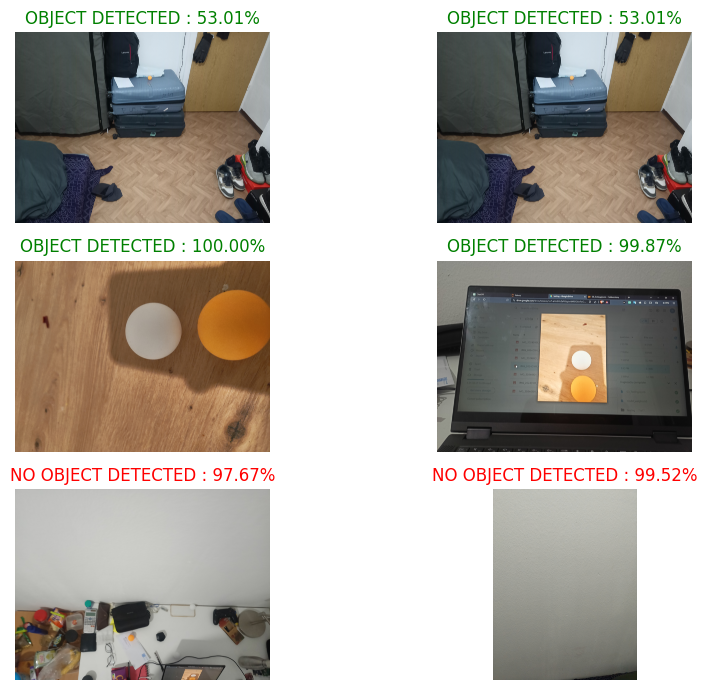

In [7]:
rows = int(input("How many Prediction you want : "))
fig , ax = plt.subplots(figsize = (10 , 7) , nrows = rows , ncols = 2 )
for i in range(rows):
  for j in range(2):
    img_path = "/content/drive/MyDrive/Colab_Notebooks/Robot/01_Object_Detection/data/testing/"
    rand_img = random.choice(os.listdir(img_path))
    img1 = img_path + rand_img
    img = ima.imread(img1)
    ax[i][j].imshow(img)
    ax[i][j].axis("off")
    image = np.array(img)
    new_size = (224, 224)
    image = cv2.resize(image, new_size, interpolation=cv2.INTER_AREA)
    image = np.expand_dims(image, axis=0)
    pred = model.predict(image)
    prediction = classes[pred.argmax()]
    if prediction == classes[0] :
      colr = "green"
    else :
      colr = "red"
    ax[i][j].set_title(f"{prediction} : {pred.max()*100:.2f}%" , color = colr);

plt.tight_layout()